In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist
import seaborn as sns

import matplotlib.pyplot as plt
import warnings

# using k-means model

In [34]:
football_df = pd.read_csv('../data/cleaned-premier-onehot.csv')
X = football_df[['avg_odd_home_win', 'avg_odd_draw', 'avg_odd_away_win']]

scale the data so it is ready to be using for clustering

In [35]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#### plot 2d

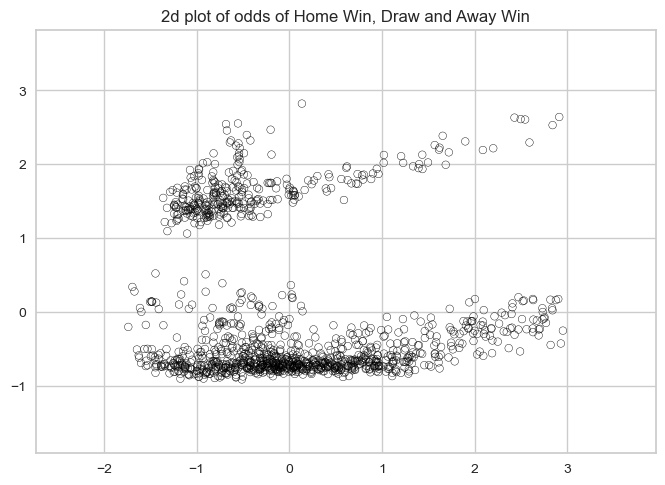

In [36]:
plt.figure()
plt.title('2d plot of odds of Home Win, Draw and Away Win')

x_min = X_scaled[:, 0].min()
x_max = X_scaled[:, 0].max()

y_min = X_scaled[:, 1].min()
y_max = X_scaled[:, 1].max()

# set plot limits
plt.xlim(x_min - 1, x_max + 1)
plt.ylim(y_min - 1, y_max + 1)

# plot the points
plt.scatter(X_scaled[:,0], X_scaled[:,1], marker='o', facecolors='none', edgecolors='black', s=30)

plt.show()

#### plot 3d

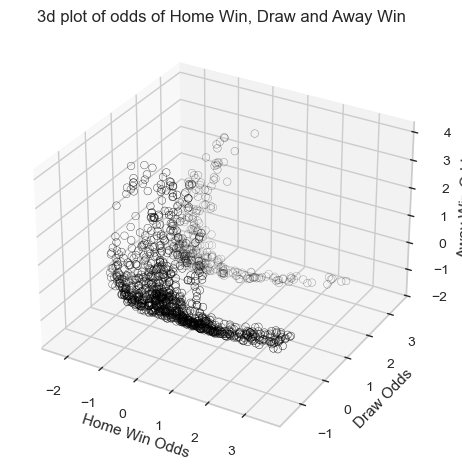

In [37]:
# create 3D figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_title('3d plot of odds of Home Win, Draw and Away Win')

x_min = X_scaled[:, 0].min()
x_max = X_scaled[:, 0].max()
y_min = X_scaled[:, 1].min()
y_max = X_scaled[:, 1].max()
z_min = X_scaled[:, 2].min()
z_max = X_scaled[:, 2].max()

# set plot limits
ax.set_xlim(x_min - 1, x_max + 1)
ax.set_ylim(y_min - 1, y_max + 1)
ax.set_zlim(z_min - 1, z_max + 1)

# axis labels
ax.set_xlabel('Home Win Odds')
ax.set_ylabel('Draw Odds')
ax.set_zlabel('Away Win Odds')

# plot the points
ax.scatter(X_scaled[:, 0], X_scaled[:, 1], X_scaled[:, 2],
           marker='o', facecolors='none', edgecolors='black', s=30)

plt.show()


### use Elbow method to find K

In [38]:
#ignore the warning about memory leak
warnings.filterwarnings("ignore", message="KMeans is known to have a memory leak")

#cluster range
distortions = []
K = range(2, 10)

for k in K:
    model = KMeans(n_clusters=k, n_init=10, random_state=42)
    model.fit(X_scaled)
    distortions.append(
        sum(np.min(cdist(X_scaled, model.cluster_centers_, 'euclidean'), axis=1)) / X_scaled.shape[0]
    )

print("Distortion:", distortions)

Distortion: [1.221609019061323, 0.961762526601313, 0.797441155499938, 0.7177516079286628, 0.6428843097747479, 0.5864256956514223, 0.5342836683057582, 0.48611951388847574]


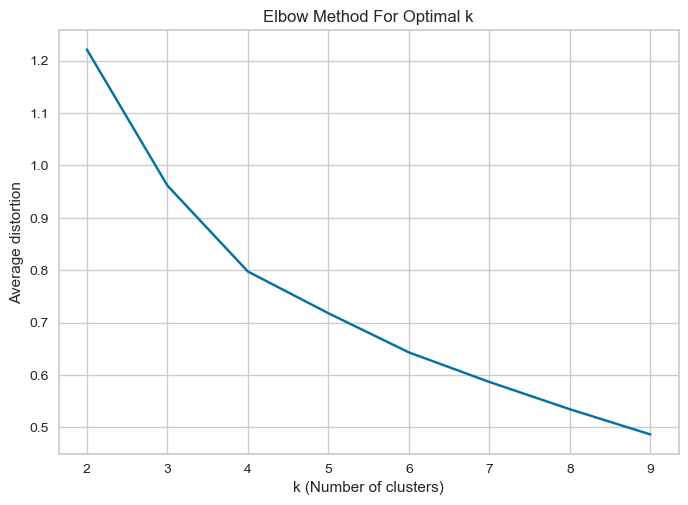

In [39]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('k (Number of clusters)')
plt.ylabel('Average distortion')
plt.title('Elbow Method For Optimal k')
plt.show()


### optimal number of cluster based on elbow method

In [40]:
num_clusters = 4

In [41]:
# Create an instance of KMeans classifier
kmeans = KMeans(init='k-means++', n_clusters=num_clusters, n_init=20)
# init: method of experimemtal finding the initial location of the centroids
# n_init: the algorithm will run n_init times with different cetroids and the best result of those will be taken

In [42]:
# Train the KMeans clustering model
kmeans.fit(X_scaled)

KMeans(n_clusters=4, n_init=20)

### Use the silhouette score to find K

In [43]:
# Determine k by maximising the silhouette score for each number of clusters
scores = []
K = range(2,10)
for k in K:
    model = KMeans(n_clusters=k, n_init=10)
    model.fit(X_scaled)
    score = metrics.silhouette_score(X_scaled, model.labels_, metric='euclidean', sample_size=len(X_scaled))
    print("\nNumber of clusters =", k)
    print("Silhouette score =", score)
    scores.append(score)
    
    best_k = K[np.argmax(scores)]
# print for spacing
print()
print("Best k based on silhouette score:", best_k)
    


Number of clusters = 2
Silhouette score = 0.4256611138597899

Number of clusters = 3
Silhouette score = 0.4188182306132723

Number of clusters = 4
Silhouette score = 0.467046847579678

Number of clusters = 5
Silhouette score = 0.421998012834638

Number of clusters = 6
Silhouette score = 0.42941878463978356

Number of clusters = 7
Silhouette score = 0.4376091653864859

Number of clusters = 8
Silhouette score = 0.4417841195360157

Number of clusters = 9
Silhouette score = 0.43695045494951756

Best k based on silhouette score: 4


### plot the silhouette score for best K

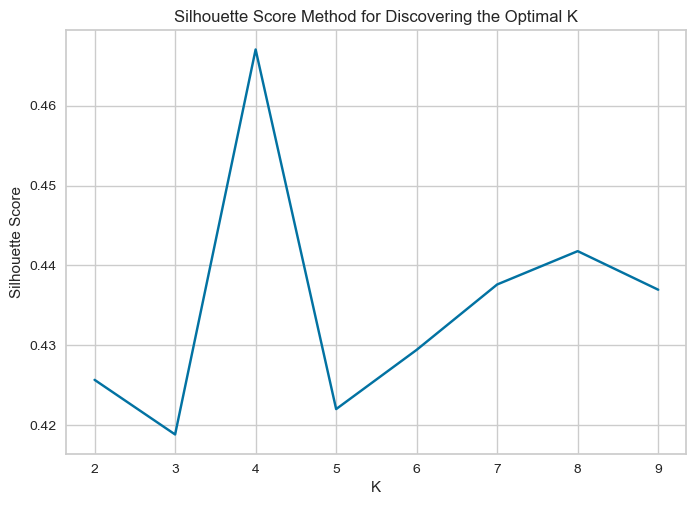

In [44]:
# find the best k with 
plt.title('Silhouette Score Method for Discovering the Optimal K')
plt.plot(K, scores, 'bx-')
plt.xlabel('K')
plt.ylabel('Silhouette Score')
plt.show()

optimal number of cluster after using both elbow and silhouette method

### Implement the model for Prediction

In [45]:
# Predict 4 clusters in X
y = kmeans.predict(X_scaled)
y

array([0, 3, 0, ..., 3, 2, 2])

##### setup consistent colouring scheme

In [46]:
# Set up consistent colors
cmap = plt.get_cmap('tab10')
colors = [cmap(i) for i in range(num_clusters)]

#### 3d plot of each cluster

Cluster 0: (532, 3)


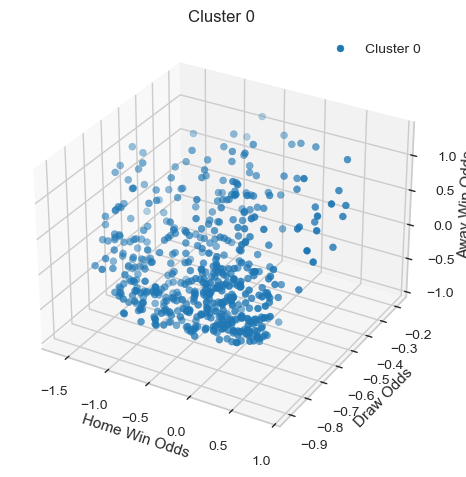

Cluster 1: (296, 3)


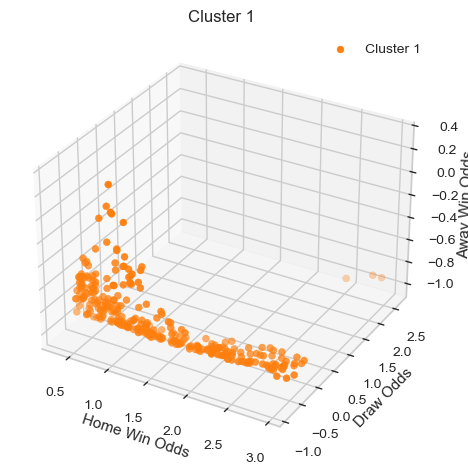

Cluster 2: (265, 3)


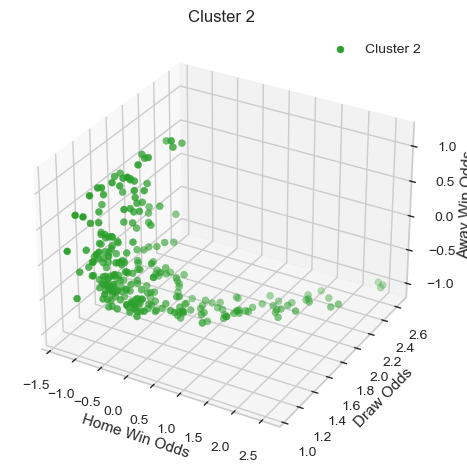

Cluster 3: (153, 3)


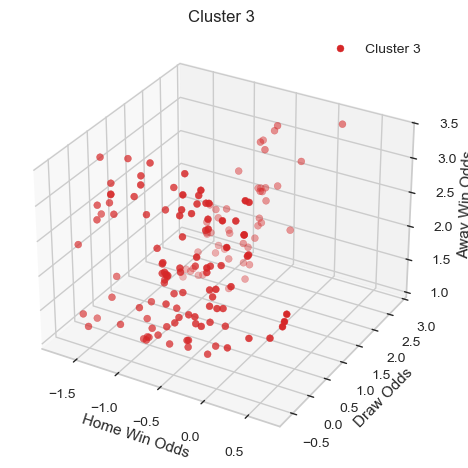

In [47]:
for i in range(num_clusters):
    cluster = X_scaled[y == i]
    print(f"Cluster {i}: {cluster.shape}")

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(cluster[:, 0], cluster[:, 1], cluster[:, 2], 
               color=colors[i], s=25, label=f"Cluster {i}")

    ax.set_xlabel('Home Win Odds')
    ax.set_ylabel('Draw Odds')
    ax.set_zlabel('Away Win Odds')
    ax.set_title(f'Cluster {i}')
    ax.legend()
    plt.grid(True)
    plt.show()

### 2d plot for the clusters

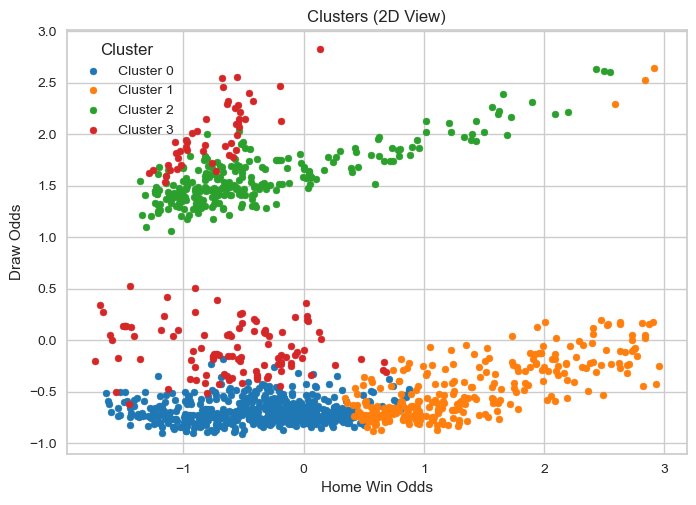

In [48]:
for i in range(num_clusters):
    cluster = X_scaled[y == i]
    plt.scatter(cluster[:, 0], cluster[:, 1], 
                color=colors[i], s=25, label=f"Cluster {i}")

plt.xlabel('Home Win Odds')
plt.ylabel('Draw Odds')
plt.title('Clusters (2D View)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

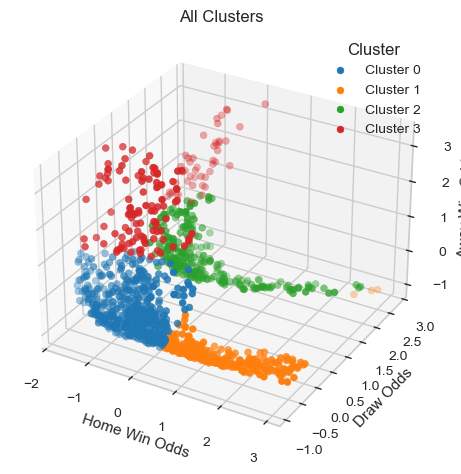

In [49]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(num_clusters):
    cluster = X_scaled[y == i]
    ax.scatter(cluster[:, 0], cluster[:, 1], cluster[:, 2], 
               color=colors[i], s=25, label=f"Cluster {i}")

ax.set_xlabel('Home Win Odds')
ax.set_ylabel('Draw Odds')
ax.set_zlabel('Away Win Odds')
ax.set_title('All Clusters')
ax.legend(title="Cluster")
plt.grid(True)
plt.show()


cluster centers

In [50]:
print(kmeans.cluster_centers_)

[[-0.37593649 -0.69008066  0.00741254]
 [ 1.36514549 -0.45804168 -0.78719555]
 [-0.39729913  1.57575402 -0.39030676]
 [-0.64575545  0.55639497  2.17318759]]


## validate the model

In [51]:
#%pip install yellowbrick

In [52]:
from yellowbrick.cluster import SilhouetteVisualizer

In [53]:
k = 4
model = KMeans(n_clusters=k, n_init=10)
model.fit_predict(X)

array([0, 1, 0, ..., 1, 2, 2])

#### Silhouette Score

In [54]:
score = silhouette_score(X, model.labels_, metric='euclidean')
print('Silhouette Score: %.3f' % score)

Silhouette Score: 0.470


#### plot the silhouette score

c:\Users\pejan\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


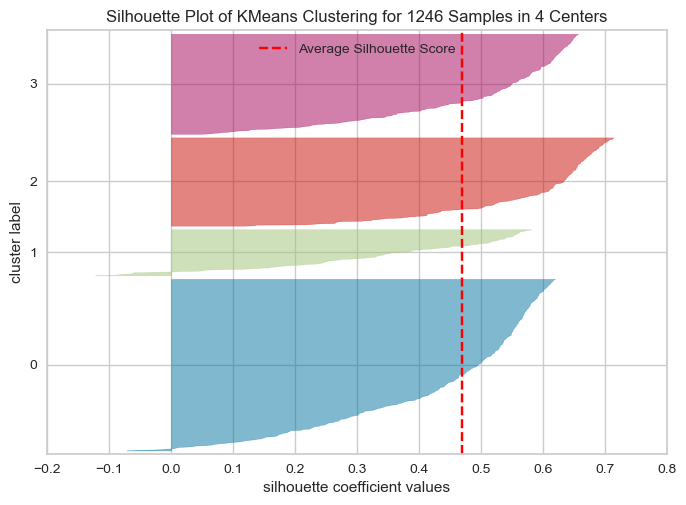

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 1246 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [55]:
# Visualize the silhouette scores of all points
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(X)
visualizer.show()  

In [56]:
# predict cluster of nonseen data
test = kmeans.predict([[5.8, 4.5, 3.2]])
print(test)

[3]


In [57]:
test = kmeans.predict([[5.8, 4.5, 3.2]]) == 3
print(test)

[ True]


#### save model

In [58]:
import joblib
joblib.dump(kmeans, '../data/k-means-model.pkl')

['../data/k-means-model.pkl']

## Try to analyzing each cluster

In [59]:
football_df['cluster'] = y

In [60]:
cluster_summary = football_df.groupby('cluster')[['avg_odd_home_win', 'avg_odd_draw', 'avg_odd_away_win']].mean()
display(cluster_summary)

,avg_odd_home_win,avg_odd_draw,avg_odd_away_win
cluster,,,
0,6.882541,3.305013,3.696583
1,8.699392,3.687145,2.422078
2,6.860249,7.036491,3.058664
3,6.600980,5.357765,7.170359


In [61]:
football_df['cluster'].value_counts().sort_index()


cluster
0    532
1    296
2    265
3    153
Name: count, dtype: int64

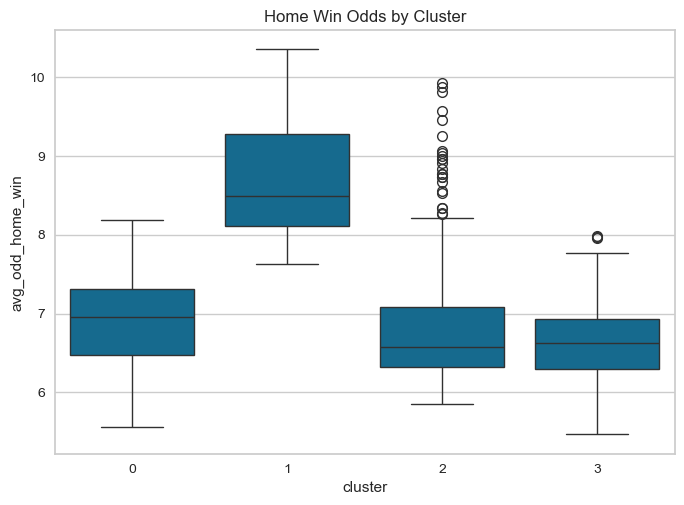

In [62]:
sns.boxplot(data=football_df, x='cluster', y='avg_odd_home_win')
plt.title("Home Win Odds by Cluster")
plt.show()


In [63]:
for i in range(num_clusters):
    print(f"Cluster {i}")
    display(football_df[football_df['cluster'] == i].describe())


Cluster 0


,home_outcome_D,home_outcome_L,home_outcome_W,avg_odd_home_win,avg_odd_draw,avg_odd_away_win,home_ranking,away_ranking,home_total_wins_so_far,home_total_draws_so_far,home_total_losses_so_far,away_total_wins_so_far,away_total_draws_so_far,away_total_losses_so_far,cluster
count,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.0
mean,0.293233,0.229323,0.477444,6.882541,3.305013,3.696583,11.250000,11.939850,5.193609,4.793233,5.836466,5.169173,4.868421,5.708647,0.0
std,0.455673,0.420793,0.499961,0.566991,0.186403,0.812588,5.380748,5.378704,3.948124,3.103141,4.255665,3.862704,3.266790,4.282369,0.0
min,0.000000,0.000000,0.000000,5.560000,2.935000,2.219000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.000000,0.000000,0.000000,6.467500,3.184500,3.048750,7.000000,8.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.0
50%,0.000000,0.000000,0.000000,6.954500,3.265500,3.553000,11.000000,12.000000,5.000000,4.500000,6.000000,5.000000,4.000000,5.000000,0.0
75%,1.000000,0.000000,1.000000,7.307750,3.395000,4.190750,16.000000,17.000000,8.000000,7.000000,9.000000,8.000000,7.000000,9.000000,0.0
max,1.000000,1.000000,1.000000,8.191000,4.138000,5.782000,20.000000,20.000000,15.000000,15.000000,19.000000,15.000000,15.000000,19.000000,0.0


Cluster 1


,home_outcome_D,home_outcome_L,home_outcome_W,avg_odd_home_win,avg_odd_draw,avg_odd_away_win,home_ranking,away_ranking,home_total_wins_so_far,home_total_draws_so_far,home_total_losses_so_far,away_total_wins_so_far,away_total_draws_so_far,away_total_losses_so_far,cluster
count,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.0
mean,0.266892,0.466216,0.266892,8.699392,3.687145,2.422078,12.949324,6.581081,5.290541,4.804054,5.391892,5.760135,4.209459,4.442568,1.0
std,0.443084,0.499702,0.443084,0.737482,0.660973,0.401964,4.982083,4.825095,3.821001,3.145422,4.096522,4.297405,2.948722,3.861599,0.0
min,0.000000,0.000000,0.000000,7.629000,2.990000,2.040000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,0.000000,0.000000,0.000000,8.107500,3.269250,2.113750,9.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.0
50%,0.000000,0.000000,0.000000,8.489500,3.481500,2.263000,13.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,4.000000,1.0
75%,1.000000,1.000000,1.000000,9.281750,4.007000,2.623250,17.000000,9.250000,8.000000,7.000000,8.000000,8.250000,6.000000,7.000000,1.0
max,1.000000,1.000000,1.000000,10.355000,8.790000,4.213000,20.000000,20.000000,17.000000,15.000000,18.000000,18.000000,15.000000,17.000000,1.0


Cluster 2


,home_outcome_D,home_outcome_L,home_outcome_W,avg_odd_home_win,avg_odd_draw,avg_odd_away_win,home_ranking,away_ranking,home_total_wins_so_far,home_total_draws_so_far,home_total_losses_so_far,away_total_wins_so_far,away_total_draws_so_far,away_total_losses_so_far,cluster
count,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.0
mean,0.215094,0.377358,0.407547,6.860249,7.036491,3.058664,12.245283,10.290566,5.000000,3.709434,6.758491,5.947170,3.607547,5.807547,2.0
std,0.411665,0.485643,0.492308,0.845240,0.434012,0.885136,4.957798,5.622811,4.264903,2.223008,5.020618,4.834088,2.303805,4.780478,0.0
min,0.000000,0.000000,0.000000,5.856000,6.189000,2.005000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.0
25%,0.000000,0.000000,0.000000,6.318000,6.755000,2.342000,9.000000,5.000000,1.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.0
50%,0.000000,0.000000,0.000000,6.574000,6.939000,2.811000,12.000000,10.000000,4.000000,4.000000,6.000000,5.000000,4.000000,5.000000,2.0
75%,0.000000,1.000000,1.000000,7.084000,7.232000,3.553000,16.000000,15.000000,8.000000,5.000000,11.000000,9.000000,5.000000,9.000000,2.0
max,1.000000,1.000000,1.000000,9.930000,8.775000,5.565000,20.000000,20.000000,20.000000,9.000000,21.000000,20.000000,10.000000,21.000000,2.0


Cluster 3


,home_outcome_D,home_outcome_L,home_outcome_W,avg_odd_home_win,avg_odd_draw,avg_odd_away_win,home_ranking,away_ranking,home_total_wins_so_far,home_total_draws_so_far,home_total_losses_so_far,away_total_wins_so_far,away_total_draws_so_far,away_total_losses_so_far,cluster
count,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.0
mean,0.196078,0.124183,0.679739,6.600980,5.357765,7.170359,5.137255,13.137255,7.032680,4.339869,4.594771,5.549020,5.150327,6.738562,3.0
std,0.398332,0.330873,0.468109,0.509522,1.649736,1.043880,3.849229,4.486909,5.067204,3.071866,3.703551,4.061924,3.027878,4.912084,0.0
min,0.000000,0.000000,0.000000,5.463000,3.427000,5.438000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0
25%,0.000000,0.000000,0.000000,6.292000,4.140000,6.345000,2.000000,10.000000,3.000000,2.000000,1.000000,2.000000,3.000000,3.000000,3.0
50%,0.000000,0.000000,1.000000,6.629000,4.571000,7.098000,5.000000,13.000000,6.000000,4.000000,4.000000,5.000000,5.000000,6.000000,3.0
75%,0.000000,0.000000,1.000000,6.934000,7.241000,8.128000,6.000000,17.000000,11.000000,6.000000,7.000000,9.000000,7.000000,10.000000,3.0
max,1.000000,1.000000,1.000000,7.989000,9.088000,9.057000,20.000000,20.000000,19.000000,15.000000,15.000000,18.000000,15.000000,21.000000,3.0


### 🧠 Cluster Summary

| Cluster | Label                          | Characteristics                                                                 |
|---------|--------------------------------|--------------------------------------------------------------------------------------|
| **0**   | 🟥 Strong away favorite        | - Home has high odds to win (avg 8.70)  
|         |                                | - Away team has low odds (avg 2.42)  
|         |                                | - Home team is weaker (avg rank 13.2 vs. 6.6)  
|         |                                | - Betting market clearly favors the away team                                       |
|         |                                |                                                                                      |
| **1**   | 🟩 Mild home favorite (balanced)| - Most common type (533 matches)  
|         |                                | - Home win odds are moderate (avg 6.88)  
|         |                                | - Teams are fairly evenly matched (rank ~11 vs ~12)  
|         |                                | - Slight home edge, common in balanced league games                                 |
|         |                                |                                                                                      |
| **2**   | 🟪 Dominant home team           | - Very low away win odds (avg 7.18)  
|         |                                | - Draws are unlikely (avg 5.37)  
|         |                                | - Home team is much stronger (rank 5.1 vs. 13.3)  
|         |                                | - Betting market expects home win                                                    |
|         |                                |                                                                                      |
| **3**   | 🟨 Uncertain / away-lean match  | - Draw odds are very high (avg 7.04)  
|         |                                | - Away win is moderately likely (avg 3.06)  
|         |                                | - Rankings suggest slightly better away team  
|         |                                | - Betting market is unclear — possible away upset                                   |


#### plot update with new labels

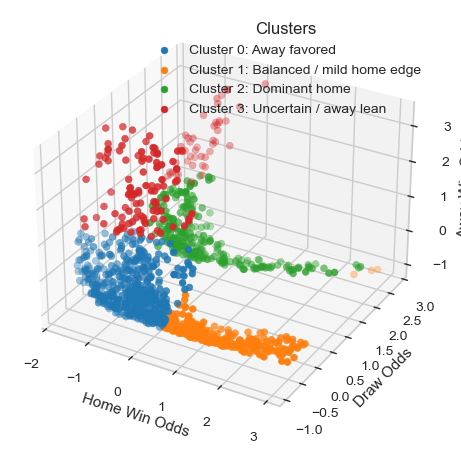

In [64]:
cluster_labels = {
    0: "Away favored",
    1: "Balanced / mild home edge",
    2: "Dominant home",
    3: "Uncertain / away lean"
}

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(num_clusters):
    cluster = X_scaled[y == i]
    ax.scatter(cluster[:, 0], cluster[:, 1], cluster[:, 2], 
               color=colors[i], s=25, label=f'Cluster {i}: {cluster_labels[i]}')

ax.set_xlabel('Home Win Odds')
ax.set_ylabel('Draw Odds')
ax.set_zlabel('Away Win Odds')

ax.legend(title="Clusters")
plt.grid(True)
plt.show()
